**EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# rcParams['figure.figsize'] = (10,7)
# rcParams['lines.linewidth'] = 2.5

#Untuk direktori drive nya disesuaikan dengan direktori dibawah ini aja, biar gak ribet ganti-gantinya nanti
df = pd.read_csv('drive/My Drive/dataset/default_payment_dataset.csv', delimiter=';')
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


<b>Descriptions:</b>
<li>Sex: 1=male, 2=female</li>
<li>Education: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown</li>
<li>Marital status: 1=married, 2=single, 3=others</li>
<li>Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)</li>
<li>Default payment (1=yes, 0=no)</li>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

<b>Tidak ditemukan data kosong</b><br>
<b>Semua data categoricals juga sudah di encoding</b>

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,...,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,...,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,...,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,...,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,...,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


In [ ]:
bill_cat=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
paybill_cat=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df[bill_cat].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000
mean,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000
std,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234
min,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000
25%,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000
50%,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000
75%,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000
max,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000


In [ ]:
df[paybill_cat].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


<b>
<li>Nilai pada Q3 (75%) memiliki jarak yang cukup jauh dengan nilai max untuk setiap kolom BILL_AMT dan PAY_AMT (indikasi outliers)</li>
<li>Untuk semua kolom BILL_AMT dan PAY_AMT juga memiliki jarak nilai min dan max yang cukup jauh</li>
</b>

In [ ]:
categoricals=['SEX', 'EDUCATION', 'MARRIAGE']
for i in categoricals:
    print(f'Value count kolom {i}:')
    print(df[i].value_counts())
    print()

Value count kolom SEX:
2    12759
1     8241
Name: SEX, dtype: int64

Value count kolom EDUCATION:
2    9789
1    7415
3    3467
5     200
4      85
6      34
0      10
Name: EDUCATION, dtype: int64

Value count kolom MARRIAGE:
2    11184
1     9561
3      219
0       36
Name: MARRIAGE, dtype: int64



<b>
    Untuk kategori SEX sudah sesuai semua dengan kategori nilai yang tersedia<br>
    Namun untuk kategori EDUCATION dan MARRIAGE, masih ada value yang bernilai 0 (tidak ada di kategori), sehingga untuk kolom EDUCATION harus diubah 0-->6, MARRIAGE 0-->3

</b>

In [ ]:
payment_status = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in payment_status:
    print(f'Value count kolom {i}:')
    print(df[i].value_counts())
    print()

Value count kolom PAY_0:
 0    10324
-1     3937
 1     2608
-2     1923
 2     1883
 3      231
 4       47
 5       19
 8       11
 6        9
 7        8
Name: PAY_0, dtype: int64

Value count kolom PAY_2:
 0    11043
-1     4174
 2     2776
-2     2643
 3      229
 4       69
 1       23
 5       21
 7       11
 6       10
 8        1
Name: PAY_2, dtype: int64

Value count kolom PAY_3:
 0    11056
-1     4125
-2     2868
 2     2670
 3      173
 4       55
 7       22
 5       14
 6       13
 8        2
 1        2
Name: PAY_3, dtype: int64

Value count kolom PAY_4:
 0    11542
-1     3949
-2     3047
 2     2208
 3      135
 4       51
 7       43
 5       19
 6        4
 8        2
Name: PAY_4, dtype: int64

Value count kolom PAY_5:
 0    11852
-1     3840
-2     3193
 2     1869
 3      132
 4       53
 7       45
 5       13
 6        2
 8        1
Name: PAY_5, dtype: int64

Value count kolom PAY_6:
 0    11450
-1     3970
-2     3427
 2     1934
 3      130
 7       34
 4     

# Univariate Analysis

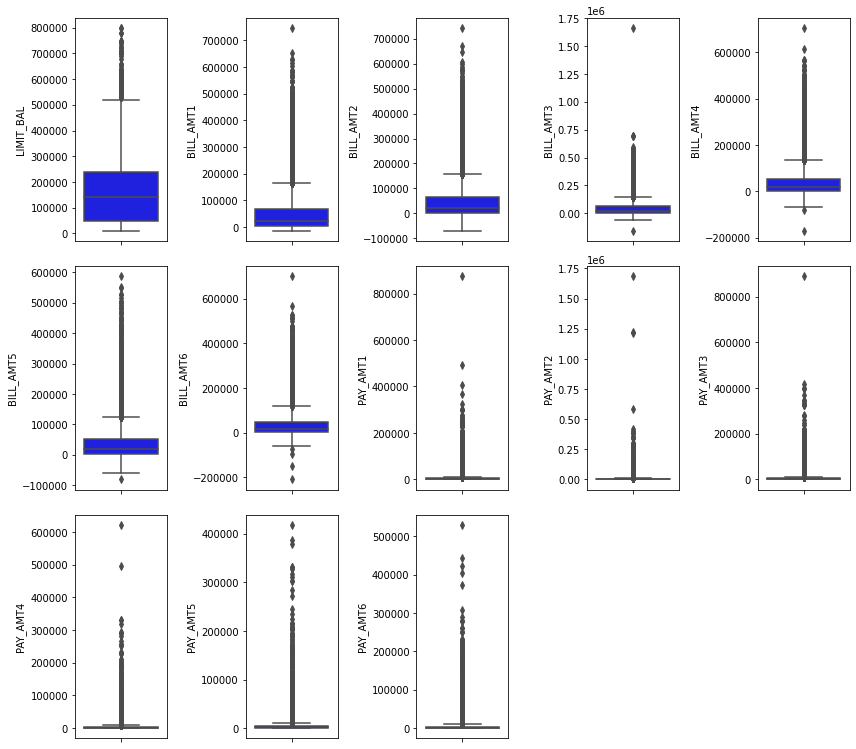

In [ ]:
account=['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
         'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# for i in range(len(account)):
#     plt.subplot(3, 5, i+1)
#     sns.boxplot(y=df[account[i]], color='green', orient='v')
#     plt.tight_layout()

plt.figure(figsize=(12,45))
for i in range(0, len(account)):
    plt.subplot(len(account), 5,i+1)
    sns.boxplot(y=df[account[i]], color='blue', orient='v')
    plt.tight_layout()

Ada indikasi outliers untuk semua fitur BILL_AMT dan fitur PAY_AMT2

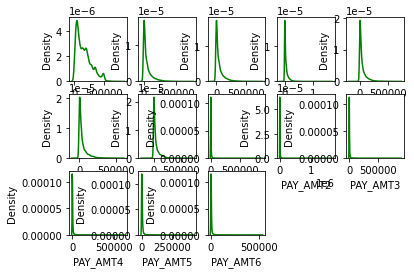

In [ ]:
for i in range(len(account)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[account[i]], color='green')

**Diantara kolom-kolom numerics, tidak ada fitur yang memiliki distribusi normal**

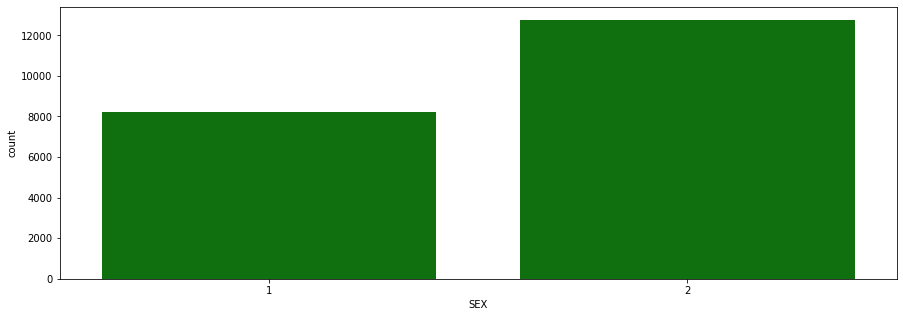

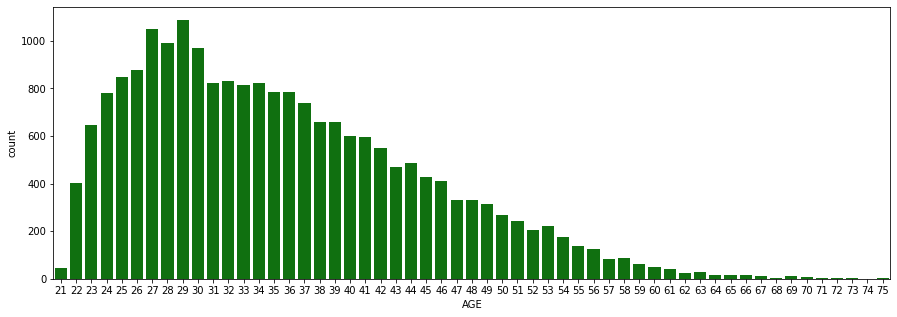

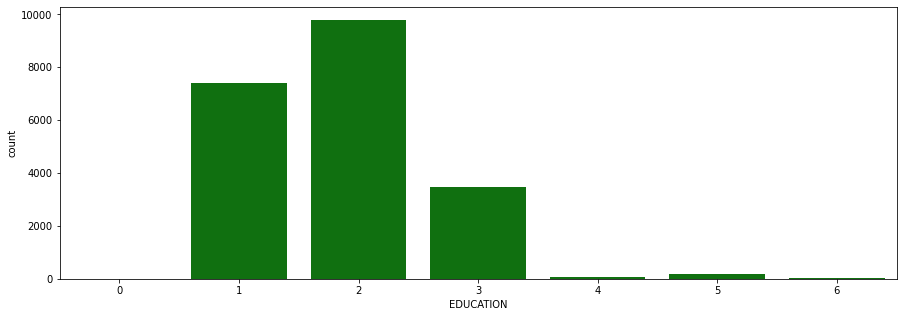

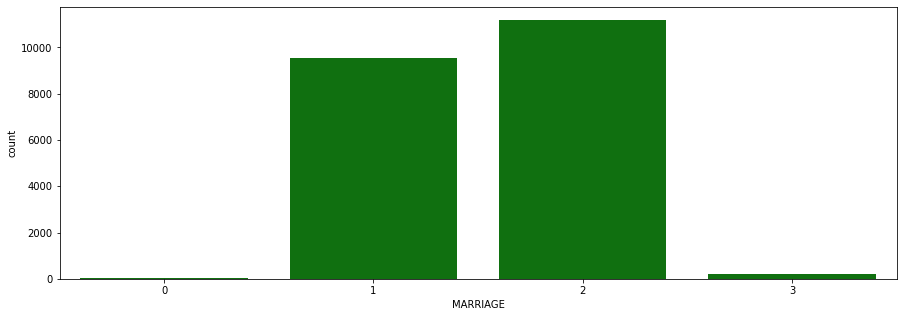

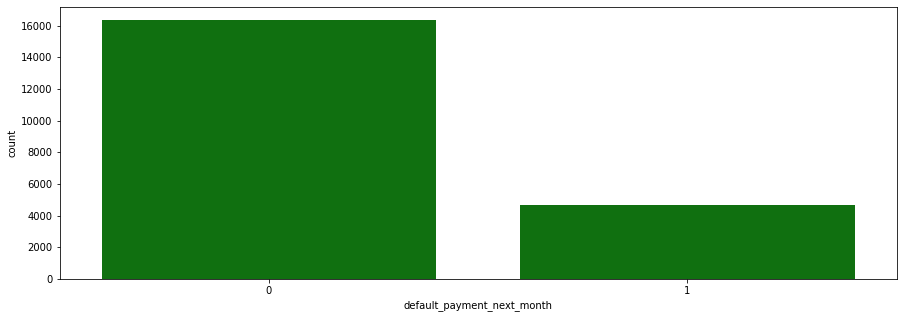

In [ ]:
categoricals_demography = ['SEX', 'AGE', 'EDUCATION', 'MARRIAGE', 'default_payment_next_month']
categoricals_payment = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for i in range(len(categoricals_demography)):
    plt.figure(figsize=(15,5))
    sns.countplot(x=df[categoricals_demography[i]], data=df, color='green')

<li>Nasabah paling banyak berjenis kelamin Perempuan</li>
<li>Sebagian besar dari nasabah masih berusia < 30 tahun</li>
<li>Kebanyakan nasabah dari bank di Taiwan memiliki latar belakang pendidikan Sarjana (S1)</li>
<li>Status dari sebagian besar nasabah bank adalah SINGLE</li>
<li>Bedasarkan dari historical data yang ada, sebagian besar nasabah yang terdaftar sudah membayar tagihan kredit sesuai dengan jatuh tempo</li>

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

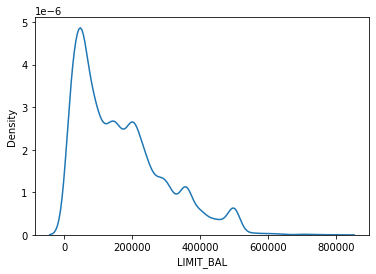

In [ ]:
sns.kdeplot(data=df, x='LIMIT_BAL')

<b>Sebagian besar nasabah memiliki limit dibawah 200.000 NTD</b>

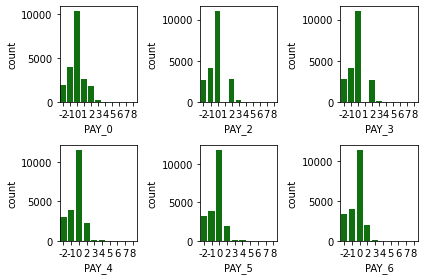

In [ ]:
for i in range(len(categoricals_payment)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categoricals_payment[i]], color='green', orient='h')
    plt.tight_layout()

<b>Untuk kategori PAY_N memiliki bentuk distribusi yang Skewed, dan sebagian besar nasabah menggunakan fasilitas kartu kredit mereka untuk melakukan penarikan tunai kredit</b>

# Multivariate Analysis

<AxesSubplot:>

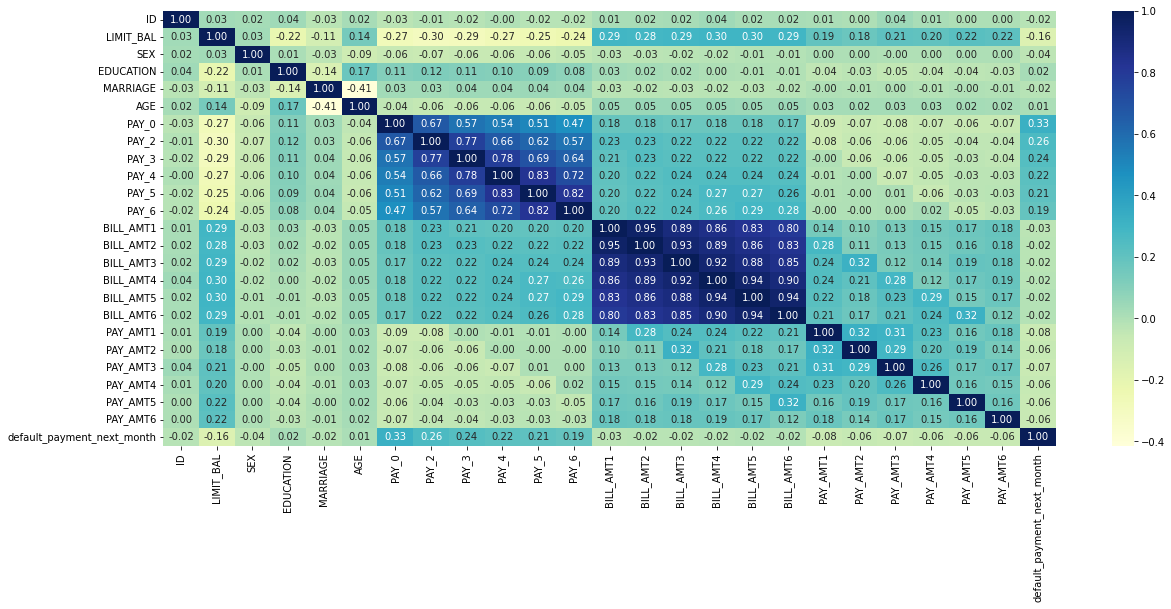

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='YlGnBu')

Fitur <b>default_payment_next_month</b> memiliki korelasi positif paling tinggi dengan fitur <b>Pay_0 - PAY_6</b>, dimana pola korelasinya adalah <b>SEMAKIN SEDIKIT PERIODE PELUNASAN KREDIT SUATU NASABAH, SEMAKIN BESAR JUGA KEMUNGKINAN NASABAH TERSEBUT UNTUK GAGAL BAYAR</b><br>

Sedangkan <b>default_payment_next_month</b> memiliki korelasi negatif paling tinggi dengan fitur <b>LIMIT_BAL</b>, dimana <b>SEMAKIN TINGGI LIMIT DARI SUATU NASABAH, MAKA KEMUNGKINAN NASABAH UNTUK GAGAL BAYAR AKAN SEMAKIN KECIL</b><br>

Sehingga, kami menyimpulkan bahwa Fitur <b>PAY_0 - PAY_6</b> dan <b>LIMIT_BAL</b> adalah fitur yang cukup menarik untuk ditelusuri lebih lanjut terhadap data target

## Business Insight

Text(0.5, 0, 'Limit Balance')

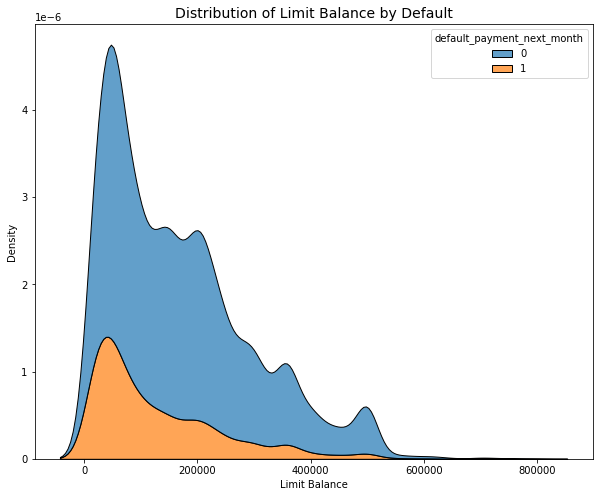

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))

sns.kdeplot(df['LIMIT_BAL'], data = df, alpha = 0.7, multiple = 'stack', hue = 'default_payment_next_month')
ax.set_title('Distribution of Limit Balance by Default', fontsize = 14)
ax.set_xlabel('Limit Balance')

In [ ]:
marriage_default = df.groupby(['MARRIAGE', 'default_payment_next_month']).agg({'ID' : 'nunique'}).reset_index()
marriage_default.columns = ['Marriage Status', 'Default', 'Total Unique Customer']

marriage = df.groupby(['MARRIAGE']).agg({'ID' : 'nunique'}).reset_index()
marriage.columns = ['Marriage Status', 'All Total Unique Customer']

pd_merge = marriage_default.merge(marriage, how = 'inner', on = 'Marriage Status')

# menambahkan kolom rasio persentase

pd_merge['Percentage Ratio'] = round((pd_merge['Total Unique Customer']/pd_merge['All Total Unique Customer'])*100, 2)
pd_merge

,Marriage Status,Default,Total Unique Customer,All Total Unique Customer,Percentage Ratio
0,0,0,34,36,94.44
1,0,1,2,36,5.56
2,1,0,7343,9561,76.80
3,1,1,2218,9561,23.20
4,2,0,8822,11184,78.88
5,2,1,2362,11184,21.12
6,3,0,156,219,71.23
7,3,1,63,219,28.77


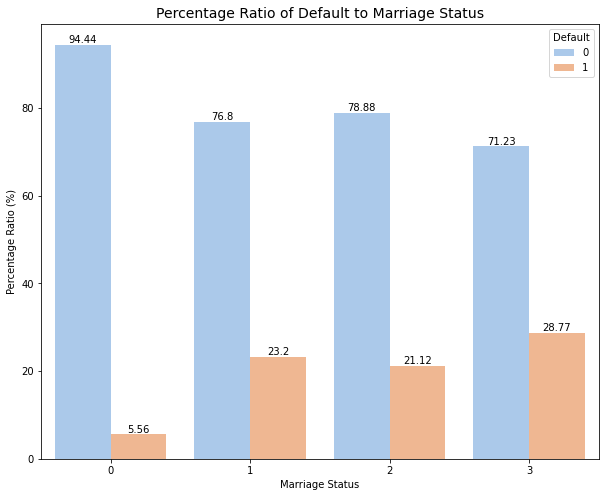

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))

sns.barplot(x = 'Marriage Status',
            y = 'Percentage Ratio',
            data = pd_merge,
            hue = 'Default',
            palette = 'pastel')
ax.set_title('Percentage Ratio of Default to Marriage Status', fontsize = 14)
ax.set_ylabel('Percentage Ratio (%)')
ax.set_xlabel('Marriage Status')

for i in ax.containers:
    ax.bar_label(i)

In [ ]:
histpay_default = df.groupby(['PAY_0', 'default_payment_next_month']).agg({'ID' : 'nunique'}).reset_index()
histpay_default.columns = ['Last History Payment', 'Default', 'Total Unique Customer']

histpay = df.groupby(['PAY_0']).agg({'ID' : 'nunique'}).reset_index()
histpay.columns = ['Last History Payment', 'All Total Unique Customer']

pd2_merge = histpay_default.merge(histpay, how = 'inner', on = 'Last History Payment')

# menambahkan kolom rasio persentase

pd2_merge['Percentage Ratio'] = round((pd2_merge['Total Unique Customer']/pd2_merge['All Total Unique Customer'])*100, 2)
pd2_merge

,Last History Payment,Default,Total Unique Customer,All Total Unique Customer,Percentage Ratio
0,-2,0,1676,1923,87.16
1,-2,1,247,1923,12.84
2,-1,0,3266,3937,82.96
3,-1,1,671,3937,17.04
4,0,0,9010,10324,87.27
5,0,1,1314,10324,12.73
6,1,0,1728,2608,66.26
7,1,1,880,2608,33.74
8,2,0,587,1883,31.17
9,2,1,1296,1883,68.83


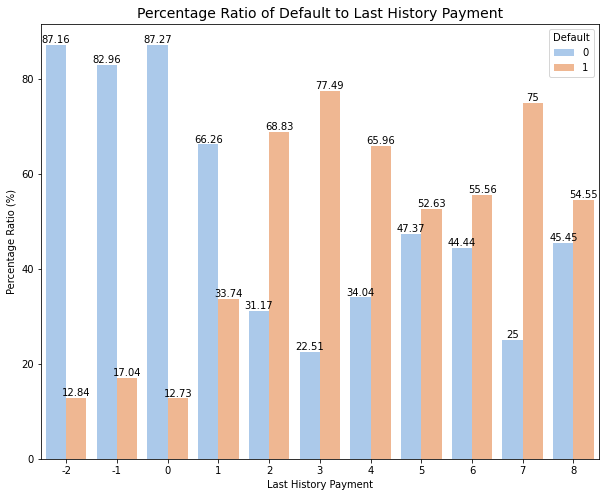

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))

sns.barplot(y = 'Percentage Ratio',
            x = 'Last History Payment',
            data = pd2_merge,
            hue = 'Default',
            palette = 'pastel')
ax.set_title('Percentage Ratio of Default to Last History Payment', fontsize = 14)
ax.set_ylabel('Percentage Ratio (%)')
ax.set_xlabel('Last History Payment')

for i in ax.containers:
    ax.bar_label(i)